# 03. Threshold Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import xgboost as xgb
from sklearn import metrics

In [2]:
base_path = "../data/processed/definitive-two-classes/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
real = pd.read_csv(base_path + "real.csv", dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})

In [3]:
# Declare feature and label columns
feature_columns = ["k1", "k2", "ValueLog10"]
label_columns = ["True_positive"]

In [4]:
# Select feature and label columns
X_train = train[feature_columns]
y_train = train[label_columns]

X_test = test[feature_columns]
y_test = test[label_columns]

X_real = real[feature_columns]
y_real = real[label_columns]

## Apply Model in Test Data

In [5]:
treshold = 1000
y_pred = np.where(test["Value"] >= treshold, 1, 0)

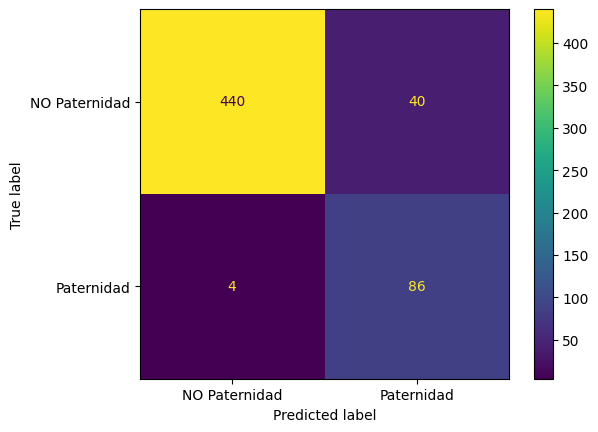

In [6]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["NO Paternidad", "Paternidad"])

cm_display.plot()
plt.show()

In [7]:
print(metrics.classification_report(y_test, y_pred, target_names = ["NO Paternidad", "Paternidad"]))

               precision    recall  f1-score   support

NO Paternidad       0.99      0.92      0.95       480
   Paternidad       0.68      0.96      0.80        90

     accuracy                           0.92       570
    macro avg       0.84      0.94      0.87       570
 weighted avg       0.94      0.92      0.93       570



## Apply Model in Real Data

In [8]:
treshold = 1000
y_pred = np.where(real["Value"] >= treshold, 1, 0)

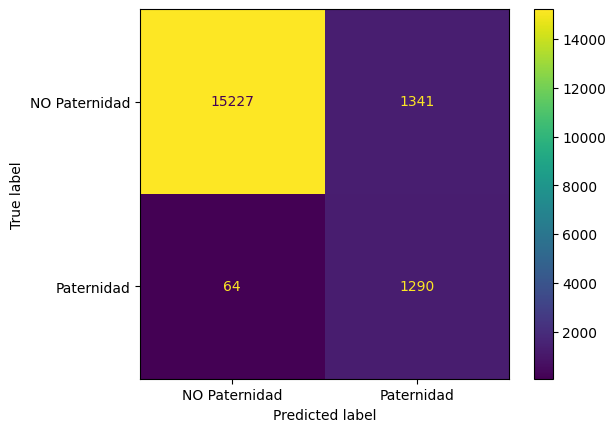

In [9]:
confusion_matrix = metrics.confusion_matrix(y_real, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["NO Paternidad", "Paternidad"])

cm_display.plot()
plt.show()

In [10]:
print(metrics.classification_report(y_real, y_pred, target_names = ["NO Paternidad", "Paternidad"]))

               precision    recall  f1-score   support

NO Paternidad       1.00      0.92      0.96     16568
   Paternidad       0.49      0.95      0.65      1354

     accuracy                           0.92     17922
    macro avg       0.74      0.94      0.80     17922
 weighted avg       0.96      0.92      0.93     17922

